
# Project: Investigate the Movies Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> This dataset is dowanloaded from kaggle.com. It is the Movies dataset. It contains information about over 10000 movies that are collected from The Movie Database (TMDb). The dataset includes the movie title, directors, cast, among others. Some of the columns like cast, keywords, and genres contains multiple values and separated by pipe (|) characters. 
> The following are the questions I ask myself for this analysis.
> ### 
<ul>
<li>Research Question 1 (Which movie genre is the most popular?)</li>
<li>Research Question 2 (Who is the most common director for movies?) </li>
<li>Research Question 3 (Which are the most common keywords?) </li>
<li>Research Question 4 (Which production companies produce the most movies?) </li>
<li> Research Question 5 (Which is the most common tagline?) </li>
</ul>

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling
> This step will involve loading the dataset, cleaning the dataset and trimming it. 

### General Properties

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
movies_df = pd.read_csv("tmdb-movies.csv")
movies_df.head(5)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
# Check number of rows and columns
movies_df.shape

(10866, 21)

In [4]:
# Describe the data
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [5]:
# Check dataset datatypes
movies_df.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

### Cleaning the data
> Here, we first drop all duplicates present in the dataset. 

> The next step involves checking the number of null values present in each column. After determining the null values, we then drop them all and check the dataset for any other null or missing values. 

In [6]:
# Drop all duplicate values. 
movies_df.drop_duplicates(inplace=True)

In [7]:
# Check all null and missing values
movies_df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7929
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [8]:
# Remove and drop all null values and missing values
movies_df = movies_df.dropna(subset=['imdb_id','cast','homepage','director','tagline','keywords','overview','genres','production_companies'])

In [9]:
# Check again to confirm all the missing and null values have been droppped. 
movies_df.isnull().sum()

id                      0
imdb_id                 0
popularity              0
budget                  0
revenue                 0
original_title          0
cast                    0
homepage                0
director                0
tagline                 0
keywords                0
overview                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
budget_adj              0
revenue_adj             0
dtype: int64

<a id='eda'></a>
## Exploratory Data Analysis
### Research Question 1 (Which movie genre is the most popular?)

In [10]:
# Function to count the top 15 most common in the dataset
def counting(param):
    counter = Counter()
    for i in param:
        counter[i] += 1
    top15_most_common = counter.most_common(15)
    return top15_most_common


Text(0.5, 0, 'Genres counts')

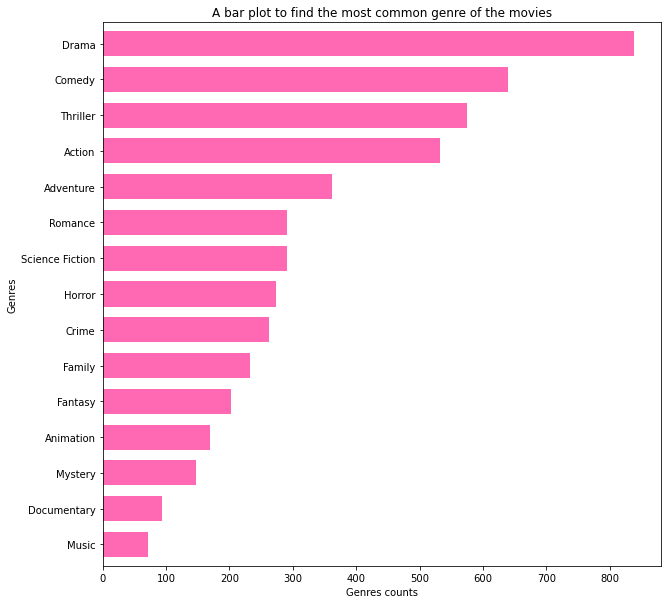

In [11]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.
genres = "|".join(movies_df['genres']).split("|")

top15_most_common_genres = counting(genres)


genres_df = pd.DataFrame (top15_most_common_genres, columns = ['genres','Genres Count'])
genres_df.sort_values(ascending=True, by='Genres Count', inplace=True)
ax = genres_df.plot.barh(x='genres',color=["#FF69B4","#F0F8FF"],width=0.7,legend=False, figsize=(10, 10), title="A bar plot to find the most common genre of the movies")
ax.set_ylabel("Genres")
ax.set_xlabel("Genres counts")

> This bar chart is used to analyze the most common genrein this movie dataset. The analysis is done for the top 15 most common genres with their number of counts in the dataset. It is clear that most of the movies produced directed are in the Drama Genre type. This is followed by Comedy, Thriller, Action and Adventure movies. It measn that these are the most watched movies. 

### Research Question 2  (Who is the most common director for movies?)

[Text(0.5, 0, 'Directors'), Text(0, 0.5, 'Directors counts')]

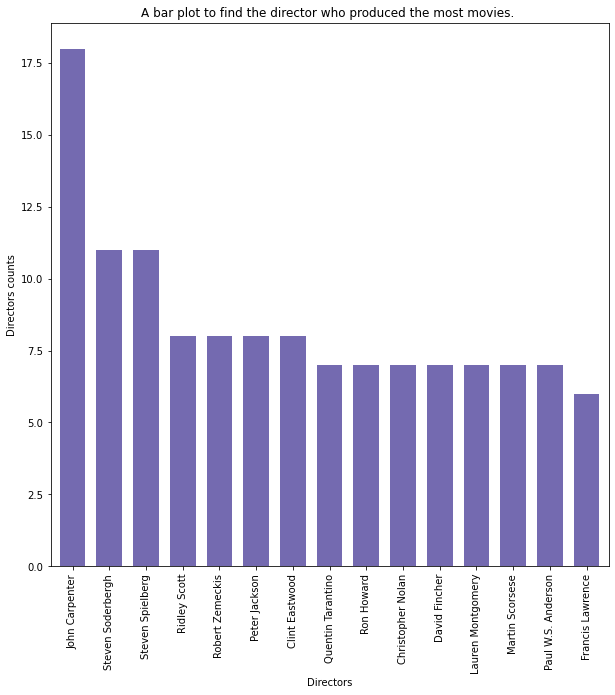

In [12]:
director = "|".join(movies_df['director']).split("|")

top15_most_common_directors = counting(director) 

director_df = pd.DataFrame (top15_most_common_directors, columns = ['director','Directors'])
director_df.sort_values(ascending=False, by='Directors', inplace=True)
ax = director_df.plot.bar(x='director',color=["#746AB0"],width=0.7,legend=False, figsize=(10, 10), title="A bar plot to find the director who produced the most movies. ")
ax.set(xlabel="Directors", ylabel="Directors counts")

> In research question two, I went further to investigate which director had produced the most movies from this dataset. I did that by finding the most common director by ther counts. I picked the top 15 most common to make the plot as shown above. I found out that John Carpenter was the most common director. Hence, John Carpenter was the director who had produced the most moves. 

### Research Question 3  (Which are the most common keywords?)

<AxesSubplot:title={'center':'A bar plot to find the most common used keyword in naming movies.'}, ylabel='Keywords'>

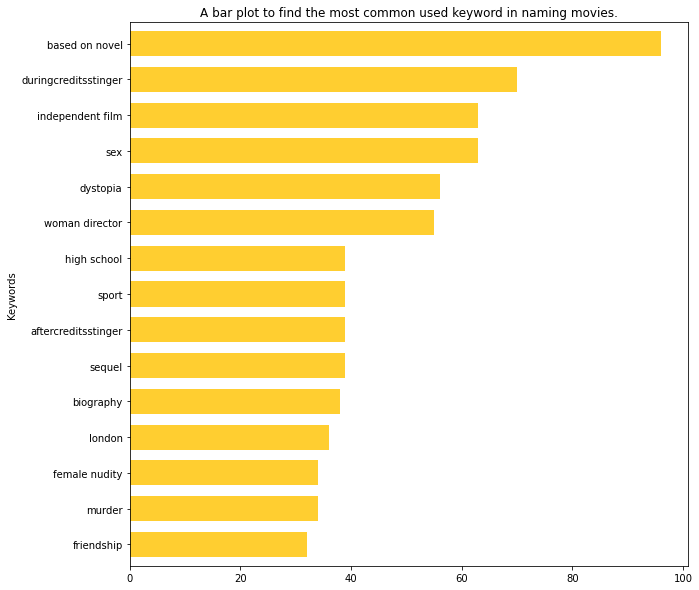

In [13]:
keywords = "|".join(movies_df['keywords']).split("|")
keywords

top15_most_common_keywords = counting(keywords) 

keywords_df = pd.DataFrame (top15_most_common_keywords, columns = ['keywords','Keywords'])
keywords_df.sort_values(ascending=True, by='Keywords', inplace=True)
keywords_df.plot.barh(x='keywords',color=["#FFCE30"],width=0.7,legend=False, figsize=(10, 10),xlabel="Keywords", ylabel="keyword counts", title="A bar plot to find the most common used keyword in naming movies.")

> I went further to find out which keyword was the most used in the movies. I was able to find this by analayzing the dataset for the most common top 15 keywords used by their counts. I found out that based on novel was the most used and most common keyword. 

### Research Question 4 (Which production companies produce the most movies?)  

<AxesSubplot:ylabel='production_companies'>

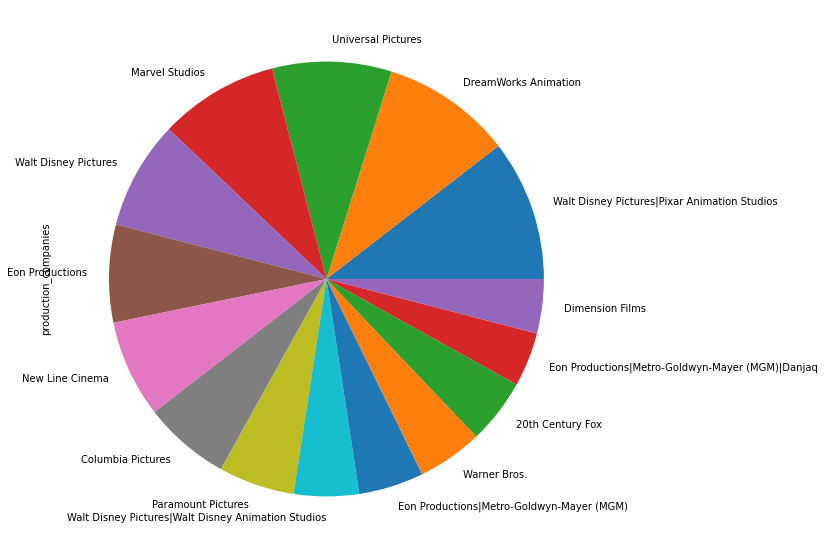

In [14]:
movies_df['production_companies'].value_counts()[:15].plot(kind='pie',figsize=(10,10))

> I investigated the production company that produces the most movies. I did that by plotting a pie char of the top 10 production companies with their counts. I found out that Walt Disney Pictures produced the most movies. 

### Research Question 5 (Which is the most common tagline?)

<AxesSubplot:ylabel='tagline'>

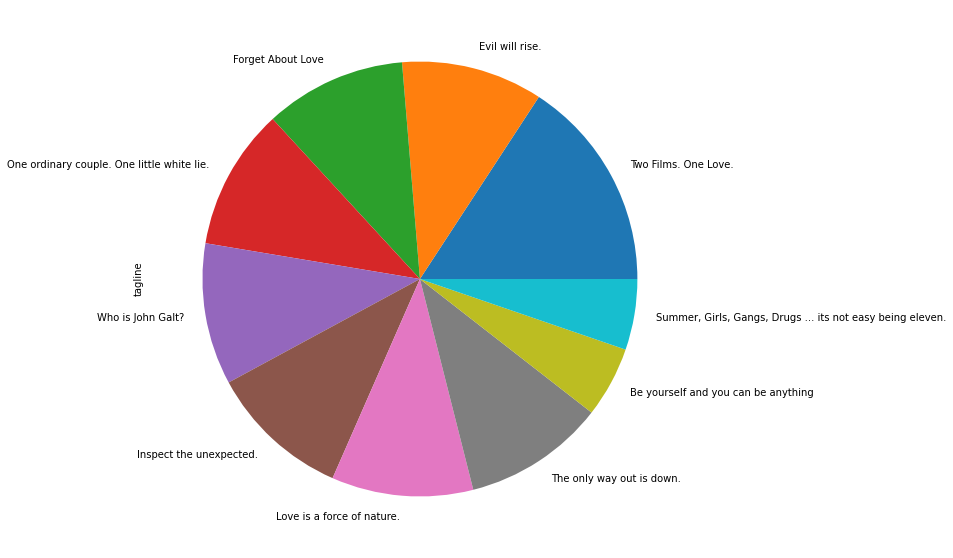

In [15]:
movies_df['tagline'].value_counts()[:10].plot(kind='pie',figsize=(10,10))

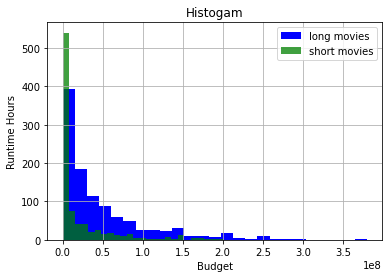

In [16]:
# Length of movies with budget
plt.hist(movies_df.budget[movies_df.runtime > 100], 25, facecolor="b", alpha=1,label="long movies")
plt.hist(movies_df.budget[movies_df.runtime < 100], 25, facecolor="g", alpha=0.75,label="short movies")
plt.legend()
plt.xlabel('Budget')
plt.ylabel('Runtime Hours')
plt.title('Histogam')
plt.grid(True)

<a id='conclusions'></a>
## Conclusions
> In the first section, I analyzed the most common genre of the movies. From the analysis, I can conclude that the top 5 genres were Drama, Comedy, Drama|Romance, Documentary,and Horror|Thriller. In the second secion, the director who directed the most movies was John Carpenter. He was followed by Steven Splelberg, Steven Soderbergh, Ridley Scott, and Robert Zemeckis. These were the most top 5 common directors. In the third section, I wanted to determine which keywords were mostly used to search for movies and the keywords used in the movies. The top 5 keywords used were Woman director, duringcreditsstringer, independent film, biography, and christmas. Further, it wa important to determine which different compnanies are known to produce and direct movies. The top five production companies are Universal Pictures, DreamWorks Animation, Marvel Studios, Walt Disney Pictures|Pixar Animation Studios, and Walt Disney Pictures. Finally, I was able to determine that the most common tagline in this analysis is Two films One love. 

## Limitations
> In the first section, the type of genres were too many to analyze and come up with a good conclusion from the analysis. Therefore, I only took an analysis of the the top 15 most common types of genres. This was the same with the directors, and keywords section where I only analyzed the top 15 common directors and keywords respectifully. A pie plot of the production companies also had many resuls from the analysis witht the data points almost with the same length. Therefore, I was only able to plot the first 15 production companies to show the relationship. 

### References.
> https://www.kaggle.com/code/danielleho/exploratory-analysis-netflix-shows-and-movies